In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import os


In [2]:
merged_dir = "../../../data/merged"
image_dir = "../../../images/DT"
train_file_path = os.path.join(merged_dir, "train_smote_tomek.parquet")
train_data = pd.read_parquet(train_file_path)
test_file_path = os.path.join(merged_dir, "test_data.parquet")
test_data = pd.read_parquet(test_file_path)

In [3]:
# Prepare features and labels
X_train = train_data.drop(columns=['fire','longitude', 'latitude']).to_numpy()
y_train = train_data['fire'].to_numpy()

X_test = test_data.drop(columns=['fire','longitude', 'latitude']).to_numpy()
y_test = test_data['fire'].to_numpy()

In [4]:
import sys
from pathlib import Path

# Add the folders where the .py files live
sys.path.append(str(Path('../../../code/myModels').resolve()))
sys.path.append(str(Path('../../../code/Metrics').resolve()))

# Now import
from DecisionTree import MyDecisionTree
from classification import ClassificationMetrics, evaluate_predictions


In [5]:
# free up memory

import gc
gc.collect()

0

In [6]:
tree = MyDecisionTree(max_depth=15, min_samples_split=100, n_bins=100, chunk_size=10000)
tree.fit(X_train, y_train)


Starting tree training with 60102 samples...
[Depth 0] Processing root node with 60102 samples
Evaluating 58 features...
-> Split node #1: X[14] <= 1.7106 (IG=0.1021)
  [Depth 1] 44630 samples, 2 classes
  Evaluating 58 features...
  -> Split node #2: X[25] <= -0.7300 (IG=0.1862)
    [Depth 2] 6064 samples, 2 classes
    Evaluating 58 features...
    -> Split node #3: X[0] <= -0.4787 (IG=0.0212)
      [Depth 3] 6003 samples, 2 classes
      Evaluating 58 features...
      -> Split node #4: X[14] <= -0.5081 (IG=0.0167)
        [Depth 4] 5957 samples, 2 classes
        Evaluating 58 features...
        -> Split node #5: X[42] <= 0.0000 (IG=0.0136)
          [Depth 5] 5945 samples, 2 classes
          Evaluating 58 features...
          -> Split node #6: X[3] <= -0.2632 (IG=0.0097)
            [Depth 6] 5619 samples, 2 classes
            Evaluating 58 features...
            -> Split node #7: X[26] <= -0.3876 (IG=0.0085)
              [Depth 7] 5613 samples, 2 classes
              Eval

In [7]:
y_pred = tree.predict(X_test)

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np

y_true = y_test

# 1️⃣ Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = np.unique(np.concatenate([y_true, y_pred]))

# Pretty-print confusion matrix
print("\nConfusion Matrix:")
print(pd.DataFrame(cm, index=labels, columns=labels))

# 2️⃣ Classification report (precision, recall, f1-score)
report = classification_report(y_true, y_pred, digits=3)
print("\nClassification Report:")
print(report)



Confusion Matrix:
      0    1
0  6858  718
1   209  674

Classification Report:
              precision    recall  f1-score   support

           0      0.970     0.905     0.937      7576
           1      0.484     0.763     0.593       883

    accuracy                          0.890      8459
   macro avg      0.727     0.834     0.765      8459
weighted avg      0.920     0.890     0.901      8459



[Text(0.6335721596724667, 0.9375, 'X14 <= 1.711'),
 Text(0.048106448311156604, 0.875, 'X25 <= -0.730'),
 Text(0.04605936540429888, 0.8125, 'X0 <= -0.479'),
 Text(0.044012282497441144, 0.75, 'X14 <= -0.508'),
 Text(0.04196519959058342, 0.6875, 'X42 <= 0.000'),
 Text(0.021494370522006142, 0.625, 'X3 <= -0.263'),
 Text(0.019447287615148412, 0.5625, 'X26 <= -0.388'),
 Text(0.017400204708290685, 0.5, 'X22 <= 0.444'),
 Text(0.009211873080859774, 0.4375, 'X11 <= -0.737'),
 Text(0.0010235414534288639, 0.375, 'X13 <= -0.746'),
 Text(0.0, 0.3125, 'class = 1'),
 Text(0.007164790174002047, 0.3125, 'X3 <= -0.316'),
 Text(0.0030706243602865915, 0.25, 'X0 <= -0.510'),
 Text(0.0020470829068577278, 0.1875, 'class = 1'),
 Text(0.00511770726714432, 0.1875, 'X0 <= -0.508'),
 Text(0.0040941658137154556, 0.125, 'class = 1'),
 Text(0.006141248720573183, 0.125, 'class = 1'),
 Text(0.008188331627430911, 0.25, 'class = 0'),
 Text(0.015353121801432957, 0.375, 'X15 <= 0.632'),
 Text(0.01330603889457523, 0.3125, '

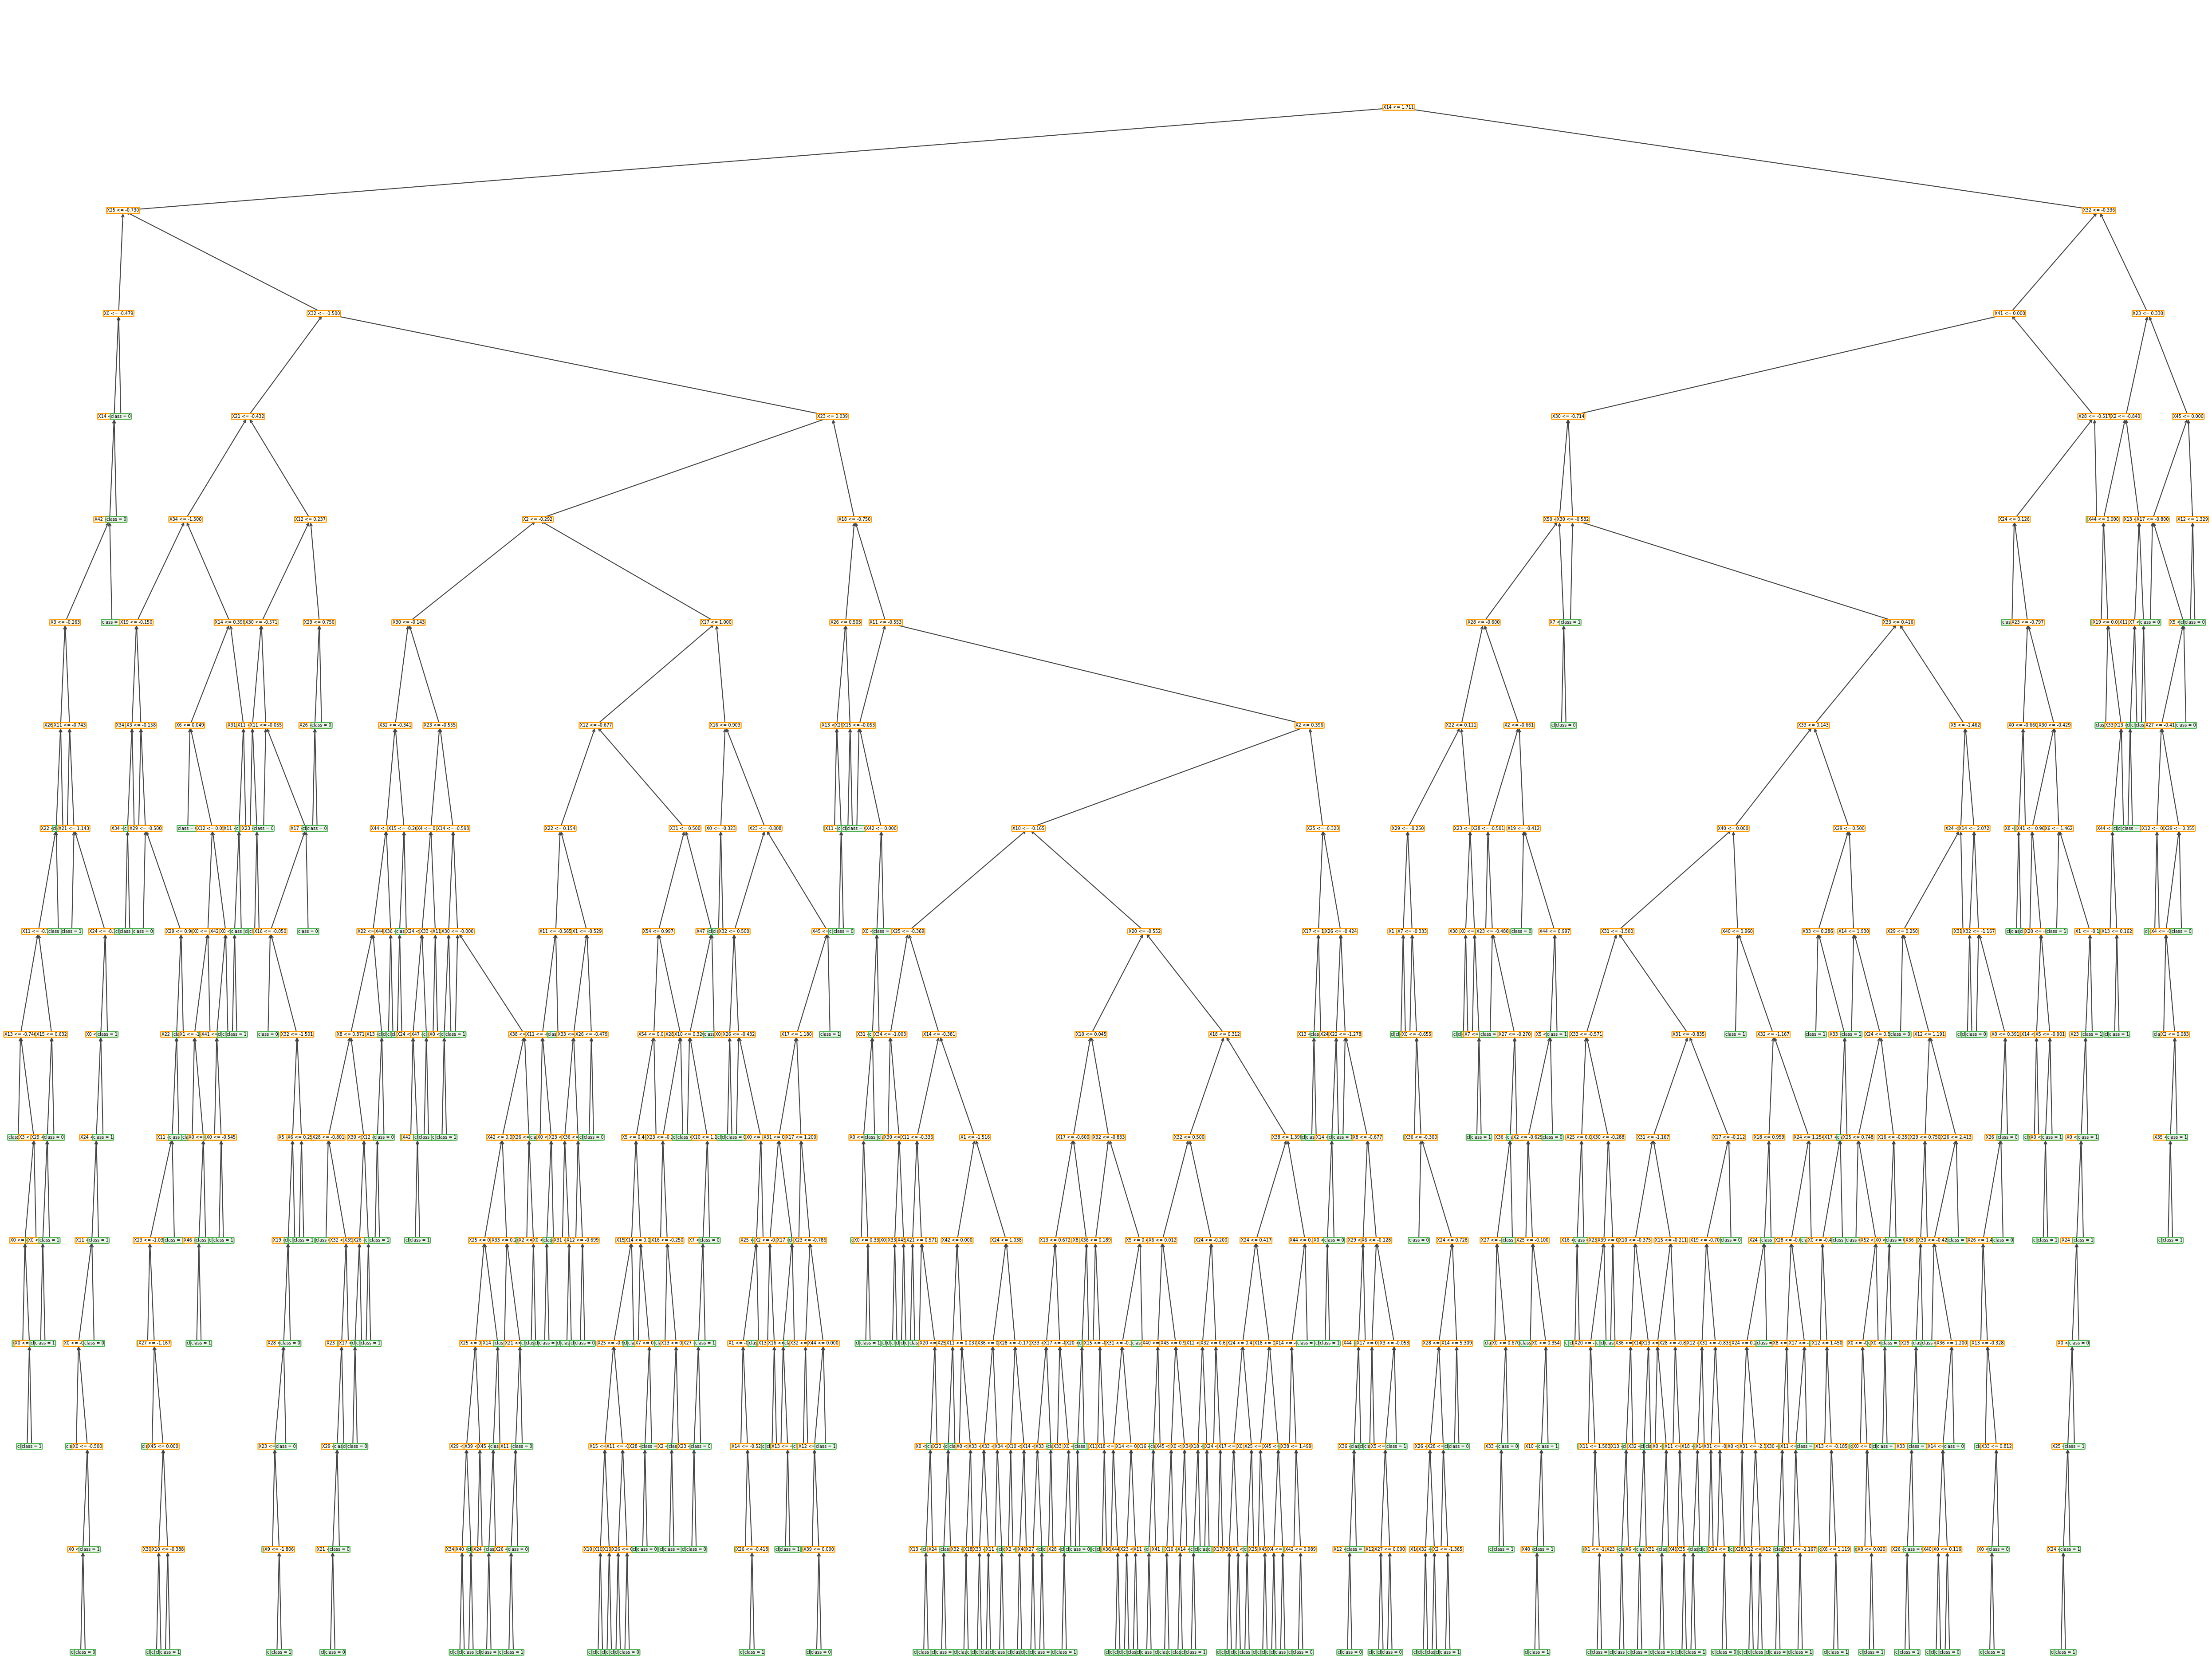

In [9]:
# Plot the tree
n_features = X_train.shape[1]
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"X{i}" for i in range(n_features)]
tree.plot(feature_names=feature_names) 

In [10]:
# Show feature importances
print("\nFeature Importances:")
importances = tree.feature_importances()
for feat_idx, importance in sorted(importances.items(), key=lambda x: x[1], reverse=True):
    print(f"  X{feat_idx}: {importance:.4f}")


Feature Importances:
  X14: 0.1912
  X32: 0.1262
  X25: 0.0835
  X23: 0.0736
  X0: 0.0505
  X30: 0.0448
  X41: 0.0420
  X2: 0.0360
  X28: 0.0273
  X12: 0.0260
  X11: 0.0230
  X21: 0.0216
  X45: 0.0210
  X17: 0.0183
  X13: 0.0170
  X26: 0.0146
  X24: 0.0145
  X34: 0.0143
  X44: 0.0141
  X33: 0.0127
  X42: 0.0124
  X29: 0.0118
  X19: 0.0115
  X7: 0.0112
  X18: 0.0107
  X50: 0.0101
  X5: 0.0086
  X3: 0.0078
  X22: 0.0063
  X31: 0.0062
  X15: 0.0043
  X6: 0.0041
  X16: 0.0035
  X27: 0.0030
  X1: 0.0024
  X10: 0.0022
  X40: 0.0020
  X4: 0.0019
  X8: 0.0019
  X36: 0.0014
  X20: 0.0014
  X47: 0.0009
  X54: 0.0009
  X38: 0.0005
  X39: 0.0002
  X35: 0.0002
  X46: 0.0001
  X52: 0.0001
  X9: 0.0000
  X49: 0.0000


In [11]:
# map feature importances to feature names
feature_names = train_data.drop(columns=['fire', 'longitude', 'latitude']).columns if hasattr(train_data, 'columns') else [f"X{i}" for i in range(n_features)]
importance_dict = {feature_names[feat_idx]: importance for feat_idx, importance in importances.items()}
# print with feature names
print("\nFeature Importances with Names:")
for feat_name, importance in sorted(importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"  {feat_name}: {importance:.4f}")


Feature Importances with Names:
  prec_median_winter: 0.1912
  tmax_iqr_spring: 0.1262
  prec_iqr_summer: 0.0835
  prec_iqr_autumn: 0.0736
  elevation: 0.0505
  tmin_iqr_winter: 0.0448
  LCCCode_0010: 0.0420
  SAND: 0.0360
  tmin_iqr_spring: 0.0273
  prec_median_spring: 0.0260
  prec_median_autumn: 0.0230
  tmax_median_summer: 0.0216
  LCCCode_20049 // 20058: 0.0210
  tmin_median_summer: 0.0183
  prec_median_summer: 0.0170
  prec_iqr_winter: 0.0146
  prec_iqr_spring: 0.0145
  tmax_iqr_winter: 0.0143
  LCCCode_11498: 0.0141
  tmax_iqr_summer: 0.0127
  LCCCode_0011: 0.0124
  tmin_iqr_summer: 0.0118
  tmax_median_autumn: 0.0115
  CN_RATIO: 0.0112
  tmin_median_winter: 0.0107
  LCCCode_21497-121340: 0.0101
  PH_WATER: 0.0086
  CLAY: 0.0078
  tmax_median_winter: 0.0063
  tmax_iqr_autumn: 0.0062
  tmin_median_autumn: 0.0043
  TOTAL_N: 0.0041
  tmin_median_spring: 0.0035
  tmin_iqr_autumn: 0.0030
  COARSE: 0.0024
  GYPSUM: 0.0022
  LCCCode_0004 // 0003: 0.0020
  TCARBON_EQ: 0.0019
  CEC_SOIL

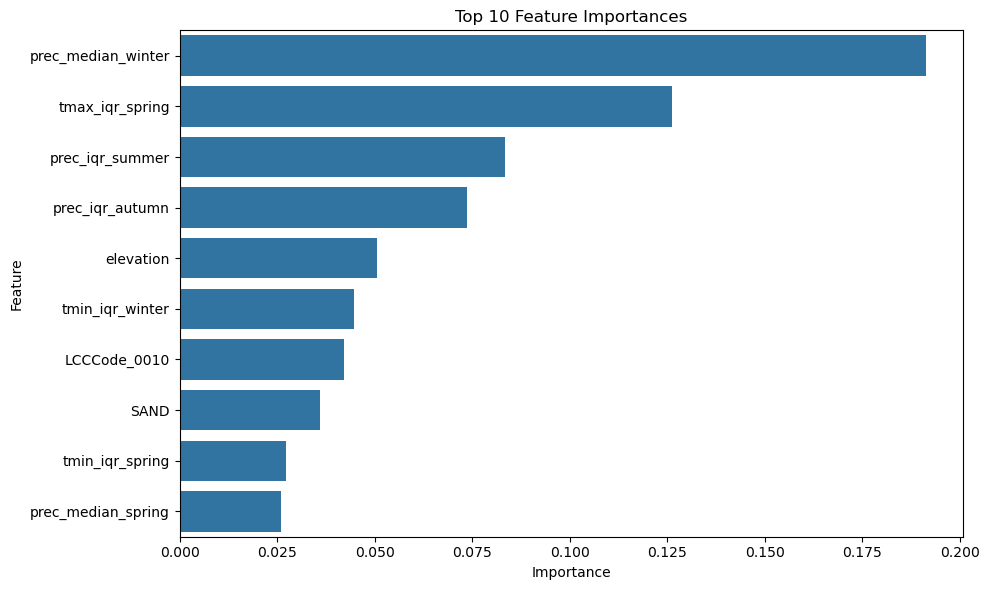

In [12]:
# Plot top 10 feature importances with their names
top_n = 10
top_features = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
feat_names, feat_importances = zip(*top_features)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(feat_importances), y=list(feat_names))
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
savepath = os.path.join(image_dir, "decision_tree_smote_tomek_feature_importances.png")
plt.savefig(savepath)
plt.show()


In [13]:
# save predictions, y_pred with their true labels and the model
import pickle
output_dir = "../../models/decision_tree"
os.makedirs(output_dir, exist_ok=True)
with open(os.path.join(output_dir, "y_test_smote_tomek.pkl"), "wb") as f:
    pickle.dump(y_test, f)
with open(os.path.join(output_dir, "y_pred_smote_tomek.pkl"), "wb") as f:
    pickle.dump(y_pred, f)
with open(os.path.join(output_dir, "decision_tree_model_smote_tomek.pkl"), "wb") as f:
    pickle.dump(tree, f)
